<a href="https://colab.research.google.com/github/Taiba053/Python_Projects/blob/main/BigSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title:Big Sales Prediction Using Random Forest Regressor


Objective:
The objective of this model is to build and evaluate a Random Forest Regressor model to predict item sales in various outlets based on features from the Big Sales Data dataset, using comprehensive data preprocessing and performance evaluation techniques.

Data Source:
Dataset hosted on GitHub

In [1]:
# Step 1: Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
# Step 2: Import Dataset
df = pd.read_csv('/content/Big Sales Data.csv')
# Display basic information about the dataset
df_head = df.head(4)
df_columns = df.columns.tolist()
df_describe = df.describe()

In [6]:
# Fill missing values in 'Item_Weight' column
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

# Replace values in 'Item_Fat_Content'
df.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}}, inplace=True)
df.replace({'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1}}, inplace=True)

df.replace({'Item_Type': {'Fruits and Vegetables': 0, 'Snack Foods': 0, 'Household': 1, 'Frozen Foods': 0,
                         'Dairy': 0, 'Baking Goods': 0, 'Canned': 0, 'Health and Hygiene': 1,
                         'Meat': 0, 'Soft Drinks': 0, 'Breads': 0, 'Hard Drinks': 0,
                         'Others': 2, 'Starchy Foods': 0, 'Breakfast': 0, 'Seafood': 0}}, inplace=True)

df.replace({'Outlet_Identifier': {'OUT027': 0, 'OUT013': 1,
                                 'OUT049': 2, 'OUT046': 3, 'OUT035': 4,
                                 'OUT045': 5, 'OUT018': 6,
                                 'OUT017': 7, 'OUT010': 8, 'OUT019': 9}}, inplace=True)

df.replace({'Outlet_Location_Type': {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}}, inplace=True)

df.replace({'Outlet_Type': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)
df.replace({'Outlet_Type': {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}}, inplace=True)

# Encode 'Outlet_Size' with one-hot encoding
df = pd.get_dummies(df, columns=['Outlet_Size'], drop_first=True)

# Drop 'Item_Identifier' column
df.drop(columns=['Item_Identifier'], inplace=True)

# Step 3: Define target(y) and features(x)
y = df['Item_Outlet_Sales']
x = df.drop(columns=['Item_Outlet_Sales'])

# Step 4: Standardize the necessary features
sc = StandardScaler()
x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = sc.fit_transform(x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])


In [7]:
# Step 5: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2529)


In [8]:
# Step 6: Train model (fit model)
model = RandomForestRegressor(random_state=2529)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=2529)

In [9]:
# Step 7: Prediction
y_pred = model.predict(x_test)

1494451.8485956222
813.6141366715042
0.5495323761349142


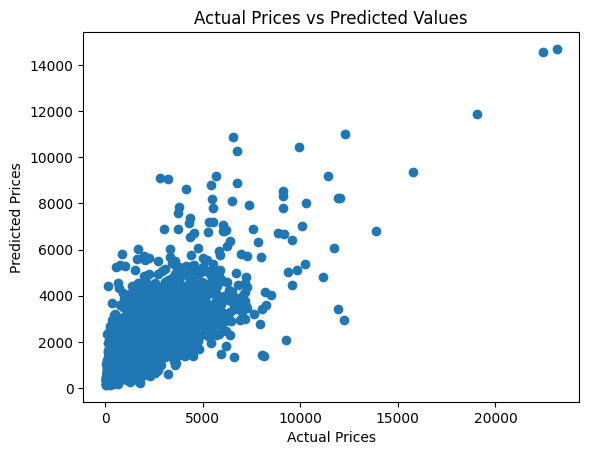

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,Low Fat,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000


In [10]:
# Step 8: Accuracy
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
r2 = r2_score(y_test, y_pred)
print(r2)

# Plot Actual Prices vs Predicted Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Values")
plt.show()
df_head

Explanation:
This model is designed to forecast item sales across different outlets using the Big Sales Data dataset with the help of a Random Forest Regressor. Here's a simplified breakdown of the process:

The necessary libraries and the dataset are imported.
Data preprocessing involves handling missing values in the 'Item_Weight' column and standardizing categorical variables like 'Item_Fat_Content.' Additionally, one-hot encoding is applied to the 'Outlet_Size' column. The 'Item_Identifier' column, which is not needed for prediction, is dropped.

The target variable (y) is set as 'Item_Outlet_Sales', and the remaining columns are designated as features (x).
Certain features are standardized to ensure they have an equal impact on the model.

The dataset is split into training and testing sets, with 80% allocated for training and 20% for testing.

A Random Forest Regressor model is trained on the training data.
The model's performance is evaluated using mean squared error (MSE), mean absolute error (MAE), and R-squared (R²) metrics to gauge the accuracy and quality of the predictions.

A scatter plot is generated to visually represent the relationship between actual and predicted sales values, providing insight into the model's performance.